# PUBG Player Analysis

### Part 1: Imports and Formatting Data

In [1]:
from __future__ import print_function,division

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import normalize
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn import feature_selection as f_select

sns.set()

%matplotlib inline

/Users/jeremy/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/jeremy/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_json('player_data.json')

In [4]:
df.head()

,Assists,Boosts,Daily_Kills,Damage_Dealt,Days,Headshot_Kills,Heals,Kills,Longest_Kill,Longest_Time_Survived,...,Round_Most_Kills,Rounds_Played,Suicides,Time_Survived,Top_10s,Vehicle_Destroys,Walk_Distance,Weekly_Kills,Wins,url
0,20,83,18,"37,675.71",4,121,13,314,947.9m,32m,...,14,45,2,18h 5m,30,2,120.7km,314,28,https://pubgtracker.com/profile/pc/sryloveWJhQ...
1,7,98,293,"40,985.14",2,338,45,404,991.3m,31m,...,21,40,0,14h 10m,29,2,95.5km,293,27,https://pubgtracker.com/profile/pc/qiaomu-SY/s...
2,0,12,727,"68,270.98",1,30,1,727,"1,421.9m",24m,...,46,19,0,6h 59m,19,13,73.4km,727,19,https://pubgtracker.com/profile/pc/w-g-qun1394...
3,16,105,83,"46,537.55",2,91,12,259,"1,018.0m",30m,...,14,32,0,12h 58m,25,1,97.0km,259,20,https://pubgtracker.com/profile/pc/vun-6556075...
4,25,524,177,"76,964.87",11,452,323,733,979.0m,34m,...,24,202,4,1d 20h 19m,39,11,292.2km,407,24,https://pubgtracker.com/profile/pc/Jerry_Burke...


In [5]:
df.tail()

,Assists,Boosts,Daily_Kills,Damage_Dealt,Days,Headshot_Kills,Heals,Kills,Longest_Kill,Longest_Time_Survived,...,Round_Most_Kills,Rounds_Played,Suicides,Time_Survived,Top_10s,Vehicle_Destroys,Walk_Distance,Weekly_Kills,Wins,url
19028,0,22,11,"2,645.30",3,6,14,21,181.0m,32m,...,5,10,1,3h 33m,4,0,23.1km,21,1,https://pubgtracker.com/profile/pc/ChuShouTV/s...
19029,1,42,8,"2,220.21",3,3,17,19,265.0m,32m,...,8,6,0,2h 12m,3,1,11.6km,8,2,https://pubgtracker.com/profile/pc/iFrod/solo?...
19030,3,47,1,"5,718.67",6,18,39,51,126.8m,29m,...,10,23,0,4h 25m,3,0,28.3km,16,1,https://pubgtracker.com/profile/pc/Eliendude/s...
19031,0,16,2,"4,749.17",7,9,31,43,192.4m,31m,...,10,18,1,4h 3m,2,0,18.5km,6,1,https://pubgtracker.com/profile/pc/LocuraSv/so...
19032,5,51,1,"7,699.19",13,4,66,53,120.5m,32m,...,5,60,2,11h 1m,7,0,52.4km,2,1,https://pubgtracker.com/profile/pc/BDUCKG/solo...


Out of 190065 players, I'm looking at 19033, a tad over 10%. This is the top 10% of PUBG Players in the North America region for Solo mode.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19033 entries, 0 to 19032
Data columns (total 24 columns):
Assists                  19033 non-null int64
Boosts                   19033 non-null object
Daily_Kills              19033 non-null int64
Damage_Dealt             19033 non-null object
Days                     19033 non-null int64
Headshot_Kills           19033 non-null object
Heals                    19033 non-null object
Kills                    19033 non-null object
Longest_Kill             19033 non-null object
Longest_Time_Survived    19033 non-null object
Losses                   19033 non-null object
Max_Kill_Streaks         19033 non-null int64
Ride_Distance            19033 non-null object
Road_Kills               19033 non-null int64
Round_Most_Kills         19033 non-null int64
Rounds_Played            19033 non-null object
Suicides                 19033 non-null int64
Time_Survived            19033 non-null object
Top_10s                  19033 non-null int64
Vehicl

In [7]:
df.columns

Index(['Assists', 'Boosts', 'Daily_Kills', 'Damage_Dealt', 'Days',
       'Headshot_Kills', 'Heals', 'Kills', 'Longest_Kill',
       'Longest_Time_Survived', 'Losses', 'Max_Kill_Streaks', 'Ride_Distance',
       'Road_Kills', 'Round_Most_Kills', 'Rounds_Played', 'Suicides',
       'Time_Survived', 'Top_10s', 'Vehicle_Destroys', 'Walk_Distance',
       'Weekly_Kills', 'Wins', 'url'],
      dtype='object')

### Part 2: Cleaning Data

In [8]:
df['Assists'] = df['Assists'].replace('[^\d.]', '',regex=True).astype(float)
df['Boosts'] = df['Boosts'].replace('[^\d.]', '',regex=True).astype(float)
df['Daily_Kills'] = df['Daily_Kills'].replace('[^\d.]', '',regex=True).astype(float)# will be dropped
df['Days'] = df['Days'].replace('[^\d.]', '',regex=True).astype(float)# will be dropped
df['Headshot_Kills'] = df['Headshot_Kills'].replace('[^\d.]', '',regex=True).astype(float)
df['Heals'] = df['Heals'].replace('[^\d.]', '',regex=True).astype(float)
df['Kills'] = df['Kills'].replace('[^\d.]', '',regex=True).astype(float)
df['Weekly_Kills'] = df['Weekly_Kills'].replace('[^\d.]', '',regex=True).astype(float)# will be dropped
df['Longest_Time_Survived'] = df['Longest_Time_Survived'].replace('[^\d.]', '',regex=True).astype(float)
df['Losses'] = df['Losses'].replace('[^\d.]', '',regex=True).astype(float)# will be dropped
df['Max_Kill_Streaks'] = df['Max_Kill_Streaks'].replace('[^\d.]', '',regex=True).astype(float)
df['Road_Kills'] = df['Road_Kills'].replace('[^\d.]', '',regex=True).astype(float)
df['Round_Most_Kills'] = df['Round_Most_Kills'].replace('[^\d.]', '',regex=True).astype(float)
df['Rounds_Played'] = df['Rounds_Played'].replace('[^\d.]', '',regex=True).astype(float)
df['Suicides'] = df['Suicides'].replace('[^\d.]', '',regex=True).astype(float)
df['Top_10s'] = df['Top_10s'].replace('[^\d.]', '',regex=True).astype(float)
df['Vehicle_Destroys'] = df['Vehicle_Destroys'].replace('[^\d.]', '',regex=True).astype(float)
df['Wins'] = df['Wins'].replace('[^\d.]', '',regex=True).astype(float)

df['Damage_Dealt'] = df['Damage_Dealt'].replace('[^\d.]', '',regex=True).astype(float)

df.head()

,Assists,Boosts,Daily_Kills,Damage_Dealt,Days,Headshot_Kills,Heals,Kills,Longest_Kill,Longest_Time_Survived,...,Round_Most_Kills,Rounds_Played,Suicides,Time_Survived,Top_10s,Vehicle_Destroys,Walk_Distance,Weekly_Kills,Wins,url
0,20.0,83.0,18.0,37675.71,4.0,121.0,13.0,314.0,947.9m,32.0,...,14.0,45.0,2.0,18h 5m,30.0,2.0,120.7km,314.0,28.0,https://pubgtracker.com/profile/pc/sryloveWJhQ...
1,7.0,98.0,293.0,40985.14,2.0,338.0,45.0,404.0,991.3m,31.0,...,21.0,40.0,0.0,14h 10m,29.0,2.0,95.5km,293.0,27.0,https://pubgtracker.com/profile/pc/qiaomu-SY/s...
2,0.0,12.0,727.0,68270.98,1.0,30.0,1.0,727.0,"1,421.9m",24.0,...,46.0,19.0,0.0,6h 59m,19.0,13.0,73.4km,727.0,19.0,https://pubgtracker.com/profile/pc/w-g-qun1394...
3,16.0,105.0,83.0,46537.55,2.0,91.0,12.0,259.0,"1,018.0m",30.0,...,14.0,32.0,0.0,12h 58m,25.0,1.0,97.0km,259.0,20.0,https://pubgtracker.com/profile/pc/vun-6556075...
4,25.0,524.0,177.0,76964.87,11.0,452.0,323.0,733.0,979.0m,34.0,...,24.0,202.0,4.0,1d 20h 19m,39.0,11.0,292.2km,407.0,24.0,https://pubgtracker.com/profile/pc/Jerry_Burke...


In [9]:
def dist_to_meters(string):
    if 'k' in string:
        result = float(re.sub("[^0-9.]", "", string))
        result = result * 1000
    else:
        result = float(re.sub("[^0-9.]", "", string))
    return result

In [10]:
df['Longest_Kill'] = df['Longest_Kill'].map(dist_to_meters)
df['Ride_Distance'] = df['Ride_Distance'].map(dist_to_meters)
df['Walk_Distance'] = df['Walk_Distance'].map(dist_to_meters)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19033 entries, 0 to 19032
Data columns (total 24 columns):
Assists                  19033 non-null float64
Boosts                   19033 non-null float64
Daily_Kills              19033 non-null float64
Damage_Dealt             19033 non-null float64
Days                     19033 non-null float64
Headshot_Kills           19033 non-null float64
Heals                    19033 non-null float64
Kills                    19033 non-null float64
Longest_Kill             19033 non-null float64
Longest_Time_Survived    19033 non-null float64
Losses                   19033 non-null float64
Max_Kill_Streaks         19033 non-null float64
Ride_Distance            19033 non-null float64
Road_Kills               19033 non-null float64
Round_Most_Kills         19033 non-null float64
Rounds_Played            19033 non-null float64
Suicides                 19033 non-null float64
Time_Survived            19033 non-null object
Top_10s                  190

In [12]:
def dhm_to_min(string):
    
    d = re.compile(r'(\d+d)')
    h = re.compile(r'(\d+h)')
    m = re.compile(r'(\d+m)')
    
    match = re.search(d, string)
    if match:
        days = int(match.group(0)[:-1])
    else:
        days = 0
        
    match = re.search(h, string)
    if match:
        hours = int(match.group(0)[:-1])
    else:
        hours = 0
        
    match = re.search(m, string)
    if match:
        minutes = int(match.group(0)[:-1])
    else:
        minutes = 0
        
    time_mins = (days * 24 * 60) + (hours * 60) + minutes
    
    return time_mins

print(dhm_to_min('18d 5m'))

25925


In [13]:
df['Time_Survived'] = df['Time_Survived'].map(dhm_to_min)

In [14]:
df.head()

,Assists,Boosts,Daily_Kills,Damage_Dealt,Days,Headshot_Kills,Heals,Kills,Longest_Kill,Longest_Time_Survived,...,Round_Most_Kills,Rounds_Played,Suicides,Time_Survived,Top_10s,Vehicle_Destroys,Walk_Distance,Weekly_Kills,Wins,url
0,20.0,83.0,18.0,37675.71,4.0,121.0,13.0,314.0,947.9,32.0,...,14.0,45.0,2.0,1085,30.0,2.0,120700.0,314.0,28.0,https://pubgtracker.com/profile/pc/sryloveWJhQ...
1,7.0,98.0,293.0,40985.14,2.0,338.0,45.0,404.0,991.3,31.0,...,21.0,40.0,0.0,850,29.0,2.0,95500.0,293.0,27.0,https://pubgtracker.com/profile/pc/qiaomu-SY/s...
2,0.0,12.0,727.0,68270.98,1.0,30.0,1.0,727.0,1421.9,24.0,...,46.0,19.0,0.0,419,19.0,13.0,73400.0,727.0,19.0,https://pubgtracker.com/profile/pc/w-g-qun1394...
3,16.0,105.0,83.0,46537.55,2.0,91.0,12.0,259.0,1018.0,30.0,...,14.0,32.0,0.0,778,25.0,1.0,97000.0,259.0,20.0,https://pubgtracker.com/profile/pc/vun-6556075...
4,25.0,524.0,177.0,76964.87,11.0,452.0,323.0,733.0,979.0,34.0,...,24.0,202.0,4.0,2659,39.0,11.0,292200.0,407.0,24.0,https://pubgtracker.com/profile/pc/Jerry_Burke...


### Feature Engineering

It's unclear from pubgtracker.com what these varaible mean. For example, is "Days" the equivalent of "Days Played" or "Days Since Purchased"? We'll drop these datapoints.

In [15]:
df = df.drop(['Daily_Kills', 'Days', 'Weekly_Kills'], axis=1)
df.head()

,Assists,Boosts,Damage_Dealt,Headshot_Kills,Heals,Kills,Longest_Kill,Longest_Time_Survived,Losses,Max_Kill_Streaks,...,Road_Kills,Round_Most_Kills,Rounds_Played,Suicides,Time_Survived,Top_10s,Vehicle_Destroys,Walk_Distance,Wins,url
0,20.0,83.0,37675.71,121.0,13.0,314.0,947.9,32.0,17.0,4.0,...,0.0,14.0,45.0,2.0,1085,30.0,2.0,120700.0,28.0,https://pubgtracker.com/profile/pc/sryloveWJhQ...
1,7.0,98.0,40985.14,338.0,45.0,404.0,991.3,31.0,14.0,9.0,...,0.0,21.0,40.0,0.0,850,29.0,2.0,95500.0,27.0,https://pubgtracker.com/profile/pc/qiaomu-SY/s...
2,0.0,12.0,68270.98,30.0,1.0,727.0,1421.9,24.0,0.0,12.0,...,0.0,46.0,19.0,0.0,419,19.0,13.0,73400.0,19.0,https://pubgtracker.com/profile/pc/w-g-qun1394...
3,16.0,105.0,46537.55,91.0,12.0,259.0,1018.0,30.0,12.0,5.0,...,0.0,14.0,32.0,0.0,778,25.0,1.0,97000.0,20.0,https://pubgtracker.com/profile/pc/vun-6556075...
4,25.0,524.0,76964.87,452.0,323.0,733.0,979.0,34.0,178.0,5.0,...,3.0,24.0,202.0,4.0,2659,39.0,11.0,292200.0,24.0,https://pubgtracker.com/profile/pc/Jerry_Burke...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19033 entries, 0 to 19032
Data columns (total 21 columns):
Assists                  19033 non-null float64
Boosts                   19033 non-null float64
Damage_Dealt             19033 non-null float64
Headshot_Kills           19033 non-null float64
Heals                    19033 non-null float64
Kills                    19033 non-null float64
Longest_Kill             19033 non-null float64
Longest_Time_Survived    19033 non-null float64
Losses                   19033 non-null float64
Max_Kill_Streaks         19033 non-null float64
Ride_Distance            19033 non-null float64
Road_Kills               19033 non-null float64
Round_Most_Kills         19033 non-null float64
Rounds_Played            19033 non-null float64
Suicides                 19033 non-null float64
Time_Survived            19033 non-null int64
Top_10s                  19033 non-null float64
Vehicle_Destroys         19033 non-null float64
Walk_Distance            1903

"URL" is an identifier, so we'll check if anyone has appeared twice and drop duplicates, then drop URL from our dataframe.

In [17]:
df.drop_duplicates(subset=['url'], inplace=True)
df = df.drop(['url'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19033 entries, 0 to 19032
Data columns (total 20 columns):
Assists                  19033 non-null float64
Boosts                   19033 non-null float64
Damage_Dealt             19033 non-null float64
Headshot_Kills           19033 non-null float64
Heals                    19033 non-null float64
Kills                    19033 non-null float64
Longest_Kill             19033 non-null float64
Longest_Time_Survived    19033 non-null float64
Losses                   19033 non-null float64
Max_Kill_Streaks         19033 non-null float64
Ride_Distance            19033 non-null float64
Road_Kills               19033 non-null float64
Round_Most_Kills         19033 non-null float64
Rounds_Played            19033 non-null float64
Suicides                 19033 non-null float64
Time_Survived            19033 non-null int64
Top_10s                  19033 non-null float64
Vehicle_Destroys         19033 non-null float64
Walk_Distance            1903

Introducing our dependent variable, Win Rate.

In [18]:
def get_win_rates(row):
    rate = row["Wins"] / row["Rounds_Played"]
    return rate
df['Win_Rate'] = df.apply(get_win_rates, axis=1)

In [19]:
# Moving win rate to the first column of the dataframe
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [20]:
df.head()

,Win_Rate,Assists,Boosts,Damage_Dealt,Headshot_Kills,Heals,Kills,Longest_Kill,Longest_Time_Survived,Losses,...,Ride_Distance,Road_Kills,Round_Most_Kills,Rounds_Played,Suicides,Time_Survived,Top_10s,Vehicle_Destroys,Walk_Distance,Wins
0,0.622222,20.0,83.0,37675.71,121.0,13.0,314.0,947.9,32.0,17.0,...,83800.0,0.0,14.0,45.0,2.0,1085,30.0,2.0,120700.0,28.0
1,0.675000,7.0,98.0,40985.14,338.0,45.0,404.0,991.3,31.0,14.0,...,58700.0,0.0,21.0,40.0,0.0,850,29.0,2.0,95500.0,27.0
2,1.000000,0.0,12.0,68270.98,30.0,1.0,727.0,1421.9,24.0,0.0,...,47300.0,0.0,46.0,19.0,0.0,419,19.0,13.0,73400.0,19.0
3,0.625000,16.0,105.0,46537.55,91.0,12.0,259.0,1018.0,30.0,12.0,...,98000.0,0.0,14.0,32.0,0.0,778,25.0,1.0,97000.0,20.0
4,0.118812,25.0,524.0,76964.87,452.0,323.0,733.0,979.0,34.0,178.0,...,335600.0,3.0,24.0,202.0,4.0,2659,39.0,11.0,292200.0,24.0


In [21]:
def get_avg_assists(row):
    avg = row["Assists"] / row["Rounds_Played"]
    return avg
df['Assists_Per_Game'] = df.apply(get_avg_assists, axis=1)

def get_avg_boosts(row):
    avg = row["Boosts"] / row["Rounds_Played"]
    return avg
df['Boosts_Per_Game'] = df.apply(get_avg_boosts, axis=1)

def get_avg_damage_dealt(row):
    avg = row["Damage_Dealt"] / row["Rounds_Played"]
    return avg
df['Damage_Dealt_Per_Game'] = df.apply(get_avg_damage_dealt, axis=1)

def get_avg_headshot_kills(row):
    avg = row["Headshot_Kills"] / row["Rounds_Played"]
    return avg
df['Headshot_Kills_Per_Game'] = df.apply(get_avg_headshot_kills, axis=1)

def get_avg_heals(row):
    avg = row['Heals'] / row['Rounds_Played']
    return avg
df['Heals_Per_Game'] = df.apply(get_avg_heals, axis=1)

def get_avg_kills(row):
    avg = row['Kills'] / row['Rounds_Played']
    return avg
df['Kills_Per_Game'] = df.apply(get_avg_kills, axis=1)

def get_avg_ride_distance(row):
    avg = row['Ride_Distance'] / row['Rounds_Played']
    return avg
df['Ride_Distance_Per_Game'] = df.apply(get_avg_ride_distance, axis=1)

def get_avg_road_kills(row):
    avg = row['Road_Kills'] / row['Rounds_Played']
    return avg
df['Road_Kills_Per_Game'] = df.apply(get_avg_road_kills, axis=1)

def get_avg_suicides(row):
    avg = row['Suicides'] / row['Rounds_Played']
    return avg
df['Suicides_Per_Game'] = df.apply(get_avg_suicides, axis=1)

def get_avg_time_survived(row):
    avg = row['Time_Survived'] / row['Rounds_Played']
    return avg
df['Time_Survived_Per_Game'] = df.apply(get_avg_time_survived, axis=1)

def get_avg_vehicle_destroys(row):
    avg = row['Vehicle_Destroys'] / row['Rounds_Played']
    return avg
df['Vehicle_Destroys_Per_Game'] = df.apply(get_avg_vehicle_destroys, axis=1)

def get_avg_walk_distance(row):
    avg = row['Walk_Distance'] / row['Rounds_Played']
    return avg
df['Walk_Distance_Per_Game'] = df.apply(get_avg_walk_distance, axis=1)

df.head()

,Win_Rate,Assists,Boosts,Damage_Dealt,Headshot_Kills,Heals,Kills,Longest_Kill,Longest_Time_Survived,Losses,...,Damage_Dealt_Per_Game,Headshot_Kills_Per_Game,Heals_Per_Game,Kills_Per_Game,Ride_Distance_Per_Game,Road_Kills_Per_Game,Suicides_Per_Game,Time_Survived_Per_Game,Vehicle_Destroys_Per_Game,Walk_Distance_Per_Game
0,0.622222,20.0,83.0,37675.71,121.0,13.0,314.0,947.9,32.0,17.0,...,837.238000,2.688889,0.288889,6.977778,1862.222222,0.000000,0.044444,24.111111,0.044444,2682.222222
1,0.675000,7.0,98.0,40985.14,338.0,45.0,404.0,991.3,31.0,14.0,...,1024.628500,8.450000,1.125000,10.100000,1467.500000,0.000000,0.000000,21.250000,0.050000,2387.500000
2,1.000000,0.0,12.0,68270.98,30.0,1.0,727.0,1421.9,24.0,0.0,...,3593.209474,1.578947,0.052632,38.263158,2489.473684,0.000000,0.000000,22.052632,0.684211,3863.157895
3,0.625000,16.0,105.0,46537.55,91.0,12.0,259.0,1018.0,30.0,12.0,...,1454.298438,2.843750,0.375000,8.093750,3062.500000,0.000000,0.000000,24.312500,0.031250,3031.250000
4,0.118812,25.0,524.0,76964.87,452.0,323.0,733.0,979.0,34.0,178.0,...,381.014208,2.237624,1.599010,3.628713,1661.386139,0.014851,0.019802,13.163366,0.054455,1446.534653


Now we're dropping potential features, so we'll use a new dataframe.

In [22]:
dfall = df.drop(['Losses','Wins'], axis=1)
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19033 entries, 0 to 19032
Data columns (total 31 columns):
Win_Rate                     19033 non-null float64
Assists                      19033 non-null float64
Boosts                       19033 non-null float64
Damage_Dealt                 19033 non-null float64
Headshot_Kills               19033 non-null float64
Heals                        19033 non-null float64
Kills                        19033 non-null float64
Longest_Kill                 19033 non-null float64
Longest_Time_Survived        19033 non-null float64
Max_Kill_Streaks             19033 non-null float64
Ride_Distance                19033 non-null float64
Road_Kills                   19033 non-null float64
Round_Most_Kills             19033 non-null float64
Rounds_Played                19033 non-null float64
Suicides                     19033 non-null float64
Time_Survived                19033 non-null int64
Top_10s                      19033 non-null float64
Vehicle_D

In [23]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19033 entries, 0 to 19032
Data columns (total 31 columns):
Win_Rate                     19033 non-null float64
Assists                      19033 non-null float64
Boosts                       19033 non-null float64
Damage_Dealt                 19033 non-null float64
Headshot_Kills               19033 non-null float64
Heals                        19033 non-null float64
Kills                        19033 non-null float64
Longest_Kill                 19033 non-null float64
Longest_Time_Survived        19033 non-null float64
Max_Kill_Streaks             19033 non-null float64
Ride_Distance                19033 non-null float64
Road_Kills                   19033 non-null float64
Round_Most_Kills             19033 non-null float64
Rounds_Played                19033 non-null float64
Suicides                     19033 non-null float64
Time_Survived                19033 non-null int64
Top_10s                      19033 non-null float64
Vehicle_D

In [24]:
dfall.head()

,Win_Rate,Assists,Boosts,Damage_Dealt,Headshot_Kills,Heals,Kills,Longest_Kill,Longest_Time_Survived,Max_Kill_Streaks,...,Damage_Dealt_Per_Game,Headshot_Kills_Per_Game,Heals_Per_Game,Kills_Per_Game,Ride_Distance_Per_Game,Road_Kills_Per_Game,Suicides_Per_Game,Time_Survived_Per_Game,Vehicle_Destroys_Per_Game,Walk_Distance_Per_Game
0,0.622222,20.0,83.0,37675.71,121.0,13.0,314.0,947.9,32.0,4.0,...,837.238000,2.688889,0.288889,6.977778,1862.222222,0.000000,0.044444,24.111111,0.044444,2682.222222
1,0.675000,7.0,98.0,40985.14,338.0,45.0,404.0,991.3,31.0,9.0,...,1024.628500,8.450000,1.125000,10.100000,1467.500000,0.000000,0.000000,21.250000,0.050000,2387.500000
2,1.000000,0.0,12.0,68270.98,30.0,1.0,727.0,1421.9,24.0,12.0,...,3593.209474,1.578947,0.052632,38.263158,2489.473684,0.000000,0.000000,22.052632,0.684211,3863.157895
3,0.625000,16.0,105.0,46537.55,91.0,12.0,259.0,1018.0,30.0,5.0,...,1454.298438,2.843750,0.375000,8.093750,3062.500000,0.000000,0.000000,24.312500,0.031250,3031.250000
4,0.118812,25.0,524.0,76964.87,452.0,323.0,733.0,979.0,34.0,5.0,...,381.014208,2.237624,1.599010,3.628713,1661.386139,0.014851,0.019802,13.163366,0.054455,1446.534653


In [25]:
dfall.columns

Index(['Win_Rate', 'Assists', 'Boosts', 'Damage_Dealt', 'Headshot_Kills',
       'Heals', 'Kills', 'Longest_Kill', 'Longest_Time_Survived',
       'Max_Kill_Streaks', 'Ride_Distance', 'Road_Kills', 'Round_Most_Kills',
       'Rounds_Played', 'Suicides', 'Time_Survived', 'Top_10s',
       'Vehicle_Destroys', 'Walk_Distance', 'Assists_Per_Game',
       'Boosts_Per_Game', 'Damage_Dealt_Per_Game', 'Headshot_Kills_Per_Game',
       'Heals_Per_Game', 'Kills_Per_Game', 'Ride_Distance_Per_Game',
       'Road_Kills_Per_Game', 'Suicides_Per_Game', 'Time_Survived_Per_Game',
       'Vehicle_Destroys_Per_Game', 'Walk_Distance_Per_Game'],
      dtype='object')

In [26]:
dfall.describe()

,Win_Rate,Assists,Boosts,Damage_Dealt,Headshot_Kills,Heals,Kills,Longest_Kill,Longest_Time_Survived,Max_Kill_Streaks,...,Damage_Dealt_Per_Game,Headshot_Kills_Per_Game,Heals_Per_Game,Kills_Per_Game,Ride_Distance_Per_Game,Road_Kills_Per_Game,Suicides_Per_Game,Time_Survived_Per_Game,Vehicle_Destroys_Per_Game,Walk_Distance_Per_Game
count,19033.000000,19033.00000,19033.000000,19033.000000,19033.000000,19033.000000,19033.000000,19033.000000,19033.000000,19033.000000,...,19033.000000,19033.000000,19033.000000,19033.000000,19033.000000,19033.000000,19033.000000,19033.000000,19033.000000,19033.000000
mean,0.059662,4.63185,75.291756,9379.102084,21.163558,75.928335,76.910997,288.879178,31.712657,2.022803,...,214.029992,0.580425,1.419790,1.819707,1264.463850,0.016189,0.016844,14.598679,0.016988,1450.473636
std,0.100032,4.65113,69.604618,8366.015106,34.585442,91.974304,72.797778,161.688664,1.645231,1.110302,...,180.135209,1.130318,0.848927,1.749337,835.863046,0.033232,0.025883,3.999965,0.034865,513.136240
min,0.000000,0.00000,0.000000,343.870000,0.000000,0.000000,2.000000,9.200000,19.000000,1.000000,...,6.612885,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,4.404362,0.000000,239.062500
25%,0.000000,2.00000,37.000000,4815.020000,8.000000,31.000000,39.000000,194.000000,31.000000,1.000000,...,123.042927,0.180328,0.933333,0.950617,685.185185,0.000000,0.000000,11.750000,0.000000,1093.333333
50%,0.026316,3.00000,57.000000,7090.190000,13.000000,55.000000,57.000000,252.900000,32.000000,2.000000,...,168.170556,0.293333,1.250000,1.375000,1060.759494,0.000000,0.000000,14.125000,0.000000,1376.000000
75%,0.066667,6.00000,90.000000,10916.630000,22.000000,91.000000,89.000000,329.600000,32.000000,2.000000,...,240.936667,0.500000,1.689655,2.062500,1607.142857,0.022727,0.026316,16.900000,0.022727,1719.354839
max,1.000000,98.00000,2693.000000,235714.200000,1089.000000,4675.000000,2099.000000,1537.900000,39.000000,26.000000,...,3938.580000,37.000000,20.090909,38.928571,7328.571429,1.600000,0.333333,32.666667,0.750000,4983.333333


In [27]:
dfall.corr()

,Win_Rate,Assists,Boosts,Damage_Dealt,Headshot_Kills,Heals,Kills,Longest_Kill,Longest_Time_Survived,Max_Kill_Streaks,...,Damage_Dealt_Per_Game,Headshot_Kills_Per_Game,Heals_Per_Game,Kills_Per_Game,Ride_Distance_Per_Game,Road_Kills_Per_Game,Suicides_Per_Game,Time_Survived_Per_Game,Vehicle_Destroys_Per_Game,Walk_Distance_Per_Game
Win_Rate,1.000000,-0.200127,-0.135043,0.018795,0.272340,-0.225453,0.074118,0.433892,0.030647,0.221793,...,0.786108,0.678662,0.072768,0.779450,0.342985,0.030442,0.041366,0.553157,0.256520,0.542175
Assists,-0.200127,1.000000,0.691716,0.739627,0.298974,0.622344,0.668394,0.056398,0.157925,0.165253,...,-0.151558,-0.128130,-0.084606,-0.163262,-0.126438,-0.027494,-0.053774,-0.327384,-0.057777,-0.331684
Boosts,-0.135043,0.691716,1.000000,0.723523,0.372435,0.784146,0.672885,0.098371,0.239032,0.113755,...,-0.132912,-0.078959,0.091821,-0.131811,0.029040,-0.014438,-0.009932,-0.112223,-0.022453,-0.118731
Damage_Dealt,0.018795,0.739627,0.723523,1.000000,0.719350,0.537813,0.987508,0.341759,0.123795,0.422786,...,0.176369,0.175033,-0.122988,0.177524,-0.121484,-0.042408,-0.039755,-0.273245,0.016984,-0.223621
Headshot_Kills,0.272340,0.298974,0.372435,0.719350,1.000000,0.182339,0.770328,0.487567,0.041156,0.462707,...,0.412426,0.579244,-0.094042,0.428457,0.007144,-0.025402,-0.000845,-0.015483,0.065647,0.057497
Heals,-0.225453,0.622344,0.784146,0.537813,0.182339,1.000000,0.476471,-0.030567,0.157090,0.058319,...,-0.229856,-0.161454,0.298968,-0.224780,-0.023127,-0.013726,-0.011475,-0.179930,-0.070295,-0.198330
Kills,0.074118,0.668394,0.672885,0.987508,0.770328,0.476471,1.000000,0.376500,0.106189,0.466499,...,0.244334,0.240536,-0.116415,0.256515,-0.113099,-0.039324,-0.043534,-0.248355,0.036771,-0.189992
Longest_Kill,0.433892,0.056398,0.098371,0.341759,0.487567,-0.030567,0.376500,1.000000,-0.036478,0.372728,...,0.578655,0.539309,-0.086941,0.571555,0.094396,-0.008782,0.032251,0.129046,0.168881,0.204216
Longest_Time_Survived,0.030647,0.157925,0.239032,0.123795,0.041156,0.157090,0.106189,-0.036478,1.000000,-0.072407,...,-0.112030,-0.099274,0.066481,-0.121886,0.120257,0.026818,0.000135,0.114905,-0.025615,0.023836
Max_Kill_Streaks,0.221793,0.165253,0.113755,0.422786,0.462707,0.058319,0.466499,0.372728,-0.072407,1.000000,...,0.462556,0.396378,-0.081059,0.481962,-0.023038,0.027530,0.003269,-0.134798,0.102199,-0.080455


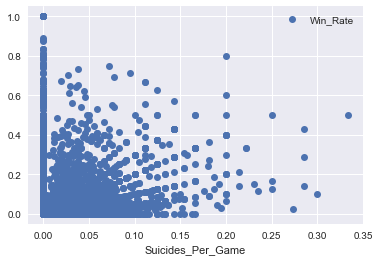

In [28]:
dfall.plot(x='Suicides_Per_Game', y='Win_Rate', style='o')

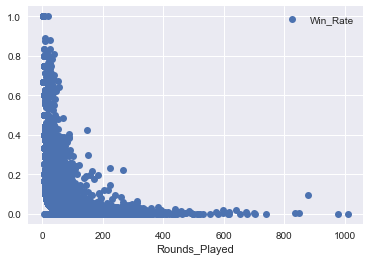

In [29]:
dfall.plot(x='Rounds_Played', y='Win_Rate', style='o')

## Linear Regression

In [30]:
# Create an empty model
lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
X = dfall.iloc[:, 1:]
# Choose the response variable(s)
y = dfall.iloc[:, 0]

X_trans = pd.DataFrame(normalize(X ,axis = 0, norm = 'max'))

# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.73930326489670928

In [31]:
X_trans.columns = X.columns
X_trans.head()

,Assists,Boosts,Damage_Dealt,Headshot_Kills,Heals,Kills,Longest_Kill,Longest_Time_Survived,Max_Kill_Streaks,Ride_Distance,...,Damage_Dealt_Per_Game,Headshot_Kills_Per_Game,Heals_Per_Game,Kills_Per_Game,Ride_Distance_Per_Game,Road_Kills_Per_Game,Suicides_Per_Game,Time_Survived_Per_Game,Vehicle_Destroys_Per_Game,Walk_Distance_Per_Game
0,0.204082,0.030821,0.159836,0.111111,0.002781,0.149595,0.616360,0.820513,0.153846,0.045178,...,0.212574,0.072673,0.014379,0.179246,0.254104,0.000000,0.133333,0.738095,0.059259,0.538239
1,0.071429,0.036391,0.173876,0.310376,0.009626,0.192473,0.644580,0.794872,0.346154,0.031646,...,0.260152,0.228378,0.055995,0.259450,0.200244,0.000000,0.000000,0.650510,0.066667,0.479097
2,0.000000,0.004456,0.289635,0.027548,0.000214,0.346355,0.924572,0.615385,0.461538,0.025500,...,0.912311,0.042674,0.002620,0.982907,0.339694,0.000000,0.000000,0.675081,0.912281,0.775216
3,0.163265,0.038990,0.197432,0.083563,0.002567,0.123392,0.661942,0.769231,0.192308,0.052833,...,0.369244,0.076858,0.018665,0.207913,0.417885,0.000000,0.000000,0.744260,0.041667,0.608278
4,0.255102,0.194579,0.326518,0.415060,0.069091,0.349214,0.636582,0.871795,0.192308,0.180926,...,0.096739,0.060476,0.079589,0.093215,0.226700,0.009282,0.059406,0.402960,0.072607,0.290275


## StatsModels Overview

In [32]:
yp, Xp = patsy.dmatrices('Win_Rate ~ Assists + Boosts + Damage_Dealt + Headshot_Kills + Heals + Kills +\
                         Longest_Kill + Longest_Time_Survived + Max_Kill_Streaks + Ride_Distance + Road_Kills +\
                         Round_Most_Kills + Rounds_Played + Suicides + Time_Survived + Top_10s + Vehicle_Destroys +\
                         Walk_Distance + Assists_Per_Game + Boosts_Per_Game + Damage_Dealt_Per_Game + Headshot_Kills_Per_Game\
                         + Heals_Per_Game + Kills_Per_Game + Ride_Distance_Per_Game + Road_Kills_Per_Game + Suicides_Per_Game\
                         + Time_Survived_Per_Game + Vehicle_Destroys_Per_Game + Walk_Distance_Per_Game',\
                         data=dfall, return_type="dataframe")
model = sm.OLS(yp, Xp)
# Fit your model to your training set
# what is happening when we call fit?
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Win_Rate   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1796.
Date:                Mon, 29 Jan 2018   Prob (F-statistic):               0.00
Time:                        13:07:11   Log-Likelihood:                 29607.
No. Observations:               19033   AIC:                        -5.915e+04
Df Residuals:                   19002   BIC:                        -5.891e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.2650      0.008    -33.496      0.000      -0.280      -0.249
Assists                      -0.0011      0.000     -5.168      0.000      -0.002      -0.001
Boosts                       -0.0001   1.77e-05     -7.331      0.000      -0.000   -9.53e-05
Damage_Dealt              -3.334e-07   6.88e-07     -0.484      0.628   -1.68e-06    1.02e-06
Headshot_Kills            -7.787e-06   2.83e-05     -0.275      0.783   -6.33e-05    4.77e-05
Heals                      6.463e-05   9.45e-06      6.841      0.000    4.61e-05    8.31e-05
Kills                     -5.986e-05    7.3e-05     -0.820      0.412      -0.000    8.33e-05
Longest_Kill               1.465e-05    3.2e-06      4.581      0.000    8.38e-06    2.09e-05
Longest_Time_Survived         0.0048      0.000     19.526      0.000       0.004       0.005
Max_Kill_Streaks             -0.0052      0.000    -11.575      0.000      -0.006      -0.004
Ride_Distance             -2.816e-08   1.58e-08     -1.783      0.075   -5.91e-08    2.79e-09
Road_Kills                    0.0017      0.000      4.426      0.000       0.001       0.002
Round_Most_Kills             -0.0001      0.000     -0.725      0.468      -0.000       0.000
Rounds_Played                 0.0009   3.59e-05     24.184      0.000       0.001       0.001
Suicides                      0.0024      0.001      4.657      0.000       0.001       0.003
Time_Survived             -8.497e-05   5.57e-06    -15.251      0.000   -9.59e-05    -7.4e-05
Top_10s                       0.0018      0.000     12.565      0.000       0.002       0.002
Vehicle_Destroys              0.0001      0.000      0.257      0.797      -0.001       0.001
Walk_Distance              1.086e-07   3.54e-08      3.070      0.002    3.93e-08    1.78e-07
Assists_Per_Game              0.0610      0.008      7.845      0.000       0.046       0.076
Boosts_Per_Game               0.0169      0.001     20.024      0.000       0.015       0.019
Damage_Dealt_Per_Game         0.0001   2.32e-05      5.378      0.000    7.93e-05       0.000
Headshot_Kills_Per_Game       0.0099      0.001     12.030      0.000       0.008       0.011
Heals_Per_Game               -0.0106      0.001    -16.547      0.000      -0.012      -0.009
Kills_Per_Game                0.0196      0.002      8.077      0.000       0.015       0.024
Ride_Distance_Per_Game     1.236e-06   8.93e-07      1.384      0.166   -5.14e-07    2.99e-06
Road_Kills_Per_Game          -0.1370      0.016     -8.533      0.000      -0.168      -0.106
Suicides_Per_Game            -0.1339      0.021     -6.347      0.000      -0.175      -0.093
Time_Survived_Per_Game        0.0072      0.000     23.306      0.000       0.007       0.008
Vehicle_Destroys_Per_Game     0.0278      0.016      1.785      0.074      

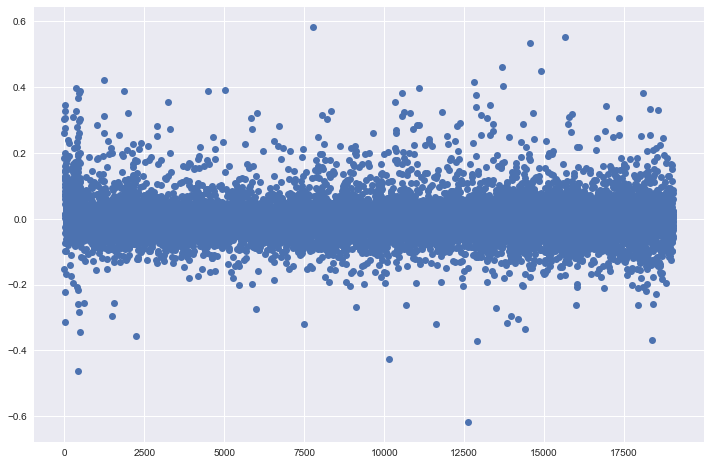

In [33]:
fit.resid.plot(style='o', figsize=(12,8));

Feature selection based on P values above - if they're above .2, we won't use that variable.

In [34]:
yp2, Xp2 = patsy.dmatrices('Win_Rate ~ Assists + Boosts + Headshot_Kills + Heals +\
                         Longest_Kill + Longest_Time_Survived + Max_Kill_Streaks + Ride_Distance + Road_Kills +\
                         Rounds_Played + Suicides + Time_Survived + Top_10s +\
                         Walk_Distance + Assists_Per_Game + Boosts_Per_Game + Damage_Dealt_Per_Game +\
                         Headshot_Kills_Per_Game + Heals_Per_Game + Kills_Per_Game + Ride_Distance_Per_Game\
                         + Road_Kills_Per_Game + Suicides_Per_Game + Time_Survived_Per_Game +\
                         Vehicle_Destroys_Per_Game + Walk_Distance_Per_Game',\
                         data=dfall, return_type="dataframe")
model2 = sm.OLS(yp2, Xp2)
# Fit your model to your training set
# what is happening when we call fit?
fit2 = model2.fit()
# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Win_Rate   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     2069.
Date:                Mon, 29 Jan 2018   Prob (F-statistic):               0.00
Time:                        13:07:11   Log-Likelihood:                 29594.
No. Observations:               19033   AIC:                        -5.913e+04
Df Residuals:                   19006   BIC:                        -5.892e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.2645      0.008    -33.560      0.000      -0.280      -0.249
Assists                      -0.0015      0.000     -7.726      0.000      -0.002      -0.001
Boosts                       -0.0002   1.61e-05    -10.316      0.000      -0.000      -0.000
Headshot_Kills               -0.0001   1.79e-05     -6.558      0.000      -0.000   -8.25e-05
Heals                      6.955e-05   9.33e-06      7.454      0.000    5.13e-05    8.78e-05
Longest_Kill               1.321e-05   3.04e-06      4.339      0.000    7.24e-06    1.92e-05
Longest_Time_Survived         0.0047      0.000     19.352      0.000       0.004       0.005
Max_Kill_Streaks             -0.0054      0.000    -12.285      0.000      -0.006      -0.005
Ride_Distance             -1.889e-08   1.56e-08     -1.211      0.226   -4.95e-08    1.17e-08
Road_Kills                    0.0016      0.000      4.249      0.000       0.001       0.002
Rounds_Played                 0.0008   3.31e-05     24.206      0.000       0.001       0.001
Suicides                      0.0025      0.001      4.992      0.000       0.002       0.004
Time_Survived             -7.944e-05   5.41e-06    -14.681      0.000   -9.01e-05   -6.88e-05
Top_10s                       0.0017      0.000     11.783      0.000       0.001       0.002
Walk_Distance              1.093e-07   3.54e-08      3.090      0.002       4e-08    1.79e-07
Assists_Per_Game              0.0686      0.007      9.268      0.000       0.054       0.083
Boosts_Per_Game               0.0178      0.001     21.810      0.000       0.016       0.019
Damage_Dealt_Per_Game         0.0001   1.59e-05      7.231      0.000     8.4e-05       0.000
Headshot_Kills_Per_Game       0.0121      0.001     17.210      0.000       0.011       0.013
Heals_Per_Game               -0.0107      0.001    -16.834      0.000      -0.012      -0.009
Kills_Per_Game                0.0186      0.002     11.167      0.000       0.015       0.022
Ride_Distance_Per_Game     1.047e-06   8.92e-07      1.174      0.240   -7.01e-07    2.79e-06
Road_Kills_Per_Game          -0.1358      0.016     -8.461      0.000      -0.167      -0.104
Suicides_Per_Game            -0.1363      0.021     -6.525      0.000      -0.177      -0.095
Time_Survived_Per_Game        0.0073      0.000     23.871      0.000       0.007       0.008
Vehicle_Destroys_Per_Game     0.0309      0.012      2.687      0.007       0.008       0.053
Walk_Distance_Per_Game    -2.716e-06   2.01e-06     -1.351      0.177   -6.66e-06    1.23e-06
==============================================================================
Omnibus:                     6923.253   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           164270.772
Skew:                     

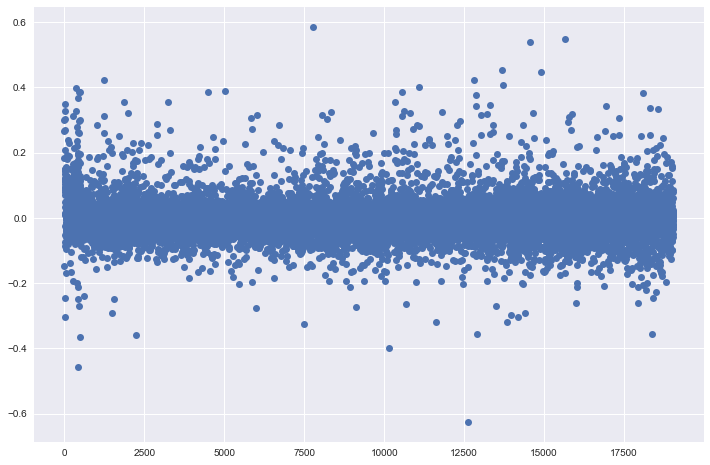

In [35]:
fit2.resid.plot(style='o', figsize=(12,8));

No improvement to R^2, but our p values are down. Maybe if we eliminate more features with high P values, the R^2 will get better?

In [36]:
yp3, Xp3 = patsy.dmatrices('Win_Rate ~ Assists + Boosts + Headshot_Kills + Heals +\
                         Longest_Kill + Longest_Time_Survived + Max_Kill_Streaks + Road_Kills +\
                         Rounds_Played + Suicides + Time_Survived + Top_10s +\
                         Walk_Distance + Assists_Per_Game + Boosts_Per_Game + Damage_Dealt_Per_Game + Heals_Per_Game +\
                         Kills_Per_Game + Road_Kills_Per_Game + Suicides_Per_Game +\
                         Time_Survived_Per_Game + Vehicle_Destroys_Per_Game',\
                         data=dfall, return_type="dataframe")
model3 = sm.OLS(yp3, Xp3)
# Fit your model to your training set
# what is happening when we call fit?
fit3 = model3.fit()
# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Win_Rate   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2395.
Date:                Mon, 29 Jan 2018   Prob (F-statistic):               0.00
Time:                        13:07:11   Log-Likelihood:                 29445.
No. Observations:               19033   AIC:                        -5.884e+04
Df Residuals:                   19010   BIC:                        -5.866e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.2683      0.008    -33.911      0.000      -0.284      -0.253
Assists                      -0.0017      0.000     -8.660      0.000      -0.002      -0.001
Boosts                       -0.0002    1.6e-05    -12.332      0.000      -0.000      -0.000
Headshot_Kills             3.731e-05   1.56e-05      2.393      0.017    6.75e-06    6.79e-05
Heals                      8.356e-05   9.22e-06      9.067      0.000    6.55e-05       0.000
Longest_Kill               1.467e-05   3.06e-06      4.791      0.000    8.67e-06    2.07e-05
Longest_Time_Survived         0.0047      0.000     19.140      0.000       0.004       0.005
Max_Kill_Streaks             -0.0063      0.000    -14.320      0.000      -0.007      -0.005
Road_Kills                    0.0016      0.000      4.484      0.000       0.001       0.002
Rounds_Played                 0.0008    3.2e-05     24.126      0.000       0.001       0.001
Suicides                      0.0023      0.000      4.769      0.000       0.001       0.003
Time_Survived             -7.006e-05   4.52e-06    -15.503      0.000   -7.89e-05   -6.12e-05
Top_10s                       0.0014      0.000      9.826      0.000       0.001       0.002
Walk_Distance              6.077e-08   2.64e-08      2.306      0.021    9.11e-09    1.12e-07
Assists_Per_Game              0.0686      0.007      9.242      0.000       0.054       0.083
Boosts_Per_Game               0.0185      0.001     22.866      0.000       0.017       0.020
Damage_Dealt_Per_Game      9.791e-05    1.6e-05      6.110      0.000    6.65e-05       0.000
Heals_Per_Game               -0.0118      0.001    -18.567      0.000      -0.013      -0.011
Kills_Per_Game                0.0255      0.002     15.680      0.000       0.022       0.029
Road_Kills_Per_Game          -0.1366      0.016     -8.771      0.000      -0.167      -0.106
Suicides_Per_Game            -0.1215      0.021     -5.859      0.000      -0.162      -0.081
Time_Survived_Per_Game        0.0073      0.000     41.195      0.000       0.007       0.008
Vehicle_Destroys_Per_Game     0.0156      0.012      1.358      0.174      -0.007       0.038
==============================================================================
Omnibus:                     6918.683   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154999.359
Skew:                           1.218   Prob(JB):                         0.00
Kurtosis:                      16.766   Cond. No.                     5.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+06. This might indica

R^2 went down slightly, but our p values are lower across the board. In terms of R^2 there are no gains so let's disregard this model and go with the 2nd one.

#### Linear Regression with Cross Validation and Feature Selection based on P Values

In [37]:
est=LinearRegression()

kf=KFold(n=len(X_trans),n_folds=10,shuffle=True, random_state = 1)

all_scores=[]

# get indices of corresponding train & test
for train,test in kf:
    x_train=X_trans.iloc[train]
    y_train=y.iloc[train]
    x_test=X_trans.iloc[test]
    y_test=y.iloc[test]
    pvals=[]
    sig_cols=[]
    
    for feature in x_train.columns:
        pval=f_select.f_regression(x_train[[feature]],y_train)
        if pval[1][0]<.02: 
            sig_cols.append(feature)
            pvals.append(pval[1][0])
            
    est.fit(x_train[sig_cols],y_train)
    r_2=est.score(x_test[sig_cols],y_test)
    all_scores.append(r_2)
        
print(np.mean(all_scores))
print(len(sig_cols))

0.732777176199
29


#### Linear Regression with Test/Train Split

In [38]:
lr=LinearRegression()

xtrain, xtest, ytrain, ytest = train_test_split(X_trans, y, test_size=0.3, random_state = 1)

lr.fit(xtrain, ytrain)
lr.score(xtest, ytest)

0.7310968248599361

### Ridge Cross Validation with Test/Train Split Scores and Feature Selection

In [39]:
rcv = RidgeCV(cv=10)
rcv.fit(xtrain, ytrain)
rcv.score(xtest,ytest)

0.73214559411915148

In [40]:
from sklearn.linear_model import Ridge

In [41]:
import warnings
warnings.filterwarnings('ignore')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


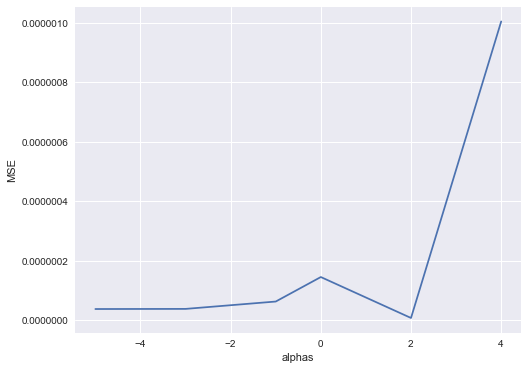

In [42]:
# Test, train, split option via Ridge 
alphas=[1e-5,1e-3,1e-1,1,100,10000]
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, random_state = 1)

def make_estimator(est,alpha):
    est.alpha=alpha
    model = est.fit(X_train,y_train)
    mse=np.mean(y_test-model.predict(X_test))**2
    return mse
    
# Get scores
all_mse=[]    
for a in alphas:    
    all_mse.append(make_estimator(Ridge(),a))
    

#plot of model
plt.figure(figsize=(8,6))
plt.legend()
plt.plot(np.log10(alphas),all_mse)
plt.legend()
plt.xlabel('alphas')
plt.ylabel('MSE')
plt.show()


In [43]:
from sklearn.linear_model import Lasso

In [44]:
# A bit more involved approach: illustrated here with Lasso
kf = KFold(len(X),n_folds=10, shuffle=True)

all_scores=[]
alphas=[1e-5,1e-3,1e-1,0,1,100]


for train, test in kf:
    x_train=X_trans.iloc[train]
    y_train=y.iloc[train]
    x_test=X_trans.iloc[test]
    y_test=y.iloc[test]
    mse_score=[]
    r2 = []
    for a in alphas:
        est=Lasso(alpha=a,tol=0.001)
        est.fit(x_train,y_train)
        mse=np.mean((y_test-est.predict(x_test))**2)
        mse_score.append(mse)
        r2.append(est.score(x_test,y_test))
            
    all_scores.append(mse_score)
#all_scores

No handles with labels found to put in legend.


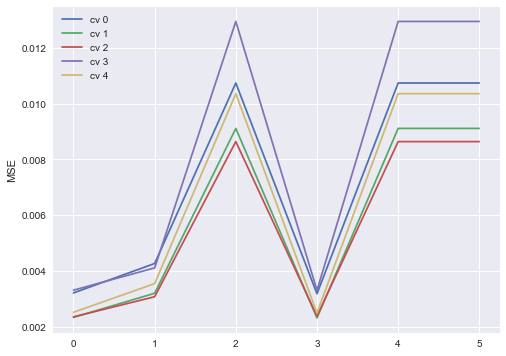

In [45]:
# Which alpha is the best for our model ? Looks like alpha= 0
plt.figure(figsize=(8,6))
#plt.ylim(0,0.1)
plt.legend()
for i in range(5):
    plt.plot(all_scores[i],label = 'cv %s'%i)
    
plt.legend()
plt.ylabel('MSE')
plt.show()

In [46]:
# Take a quick look at our strongest features
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3)

est=Lasso(alpha=0)
est.fit(X_train,y_train)
est.alpha


zipped=zip(X.columns,est.coef_)
features=sorted(zipped,key = lambda t: t[1],reverse=True)
features


[('Rounds_Played', 0.86531338336309949),
 ('Kills_Per_Game', 0.66208912186590052),
 ('Damage_Dealt_Per_Game', 0.56504593487522958),
 ('Headshot_Kills_Per_Game', 0.47738696620238164),
 ('Top_10s', 0.46701513218926993),
 ('Walk_Distance', 0.27333966898507572),
 ('Time_Survived_Per_Game', 0.26345096694002684),
 ('Heals', 0.25714096772602857),
 ('Boosts_Per_Game', 0.19448375311444227),
 ('Longest_Time_Survived', 0.17749439300051703),
 ('Assists_Per_Game', 0.065584375973988321),
 ('Suicides', 0.060419033747783991),
 ('Road_Kills', 0.055194887451670401),
 ('Vehicle_Destroys_Per_Game', 0.040060596932550499),
 ('Longest_Kill', 0.01271548366458867),
 ('Ride_Distance_Per_Game', 0.0022009661740339868),
 ('Round_Most_Kills', -0.0024965630215690936),
 ('Vehicle_Destroys', -0.012547745400570671),
 ('Headshot_Kills', -0.022307253079859885),
 ('Walk_Distance_Per_Game', -0.040399894985504003),
 ('Ride_Distance', -0.040912169224032055),
 ('Suicides_Per_Game', -0.056144089487700014),
 ('Kills', -0.084953

In [47]:
r_2

0.74826874205848148

# Scratchwork

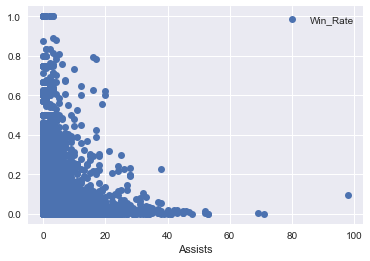

In [48]:
dfall.plot(x='Assists', y='Win_Rate', style='o')

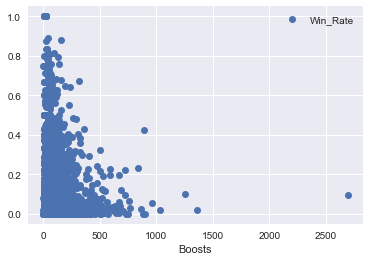

In [49]:
dfall.plot(x='Boosts', y='Win_Rate', style='o')

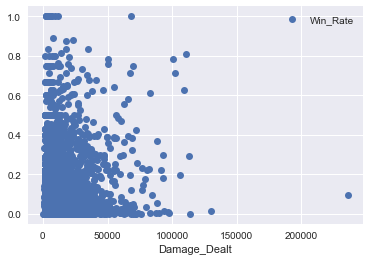

In [50]:
dfall.plot(x='Damage_Dealt', y='Win_Rate', style='o')

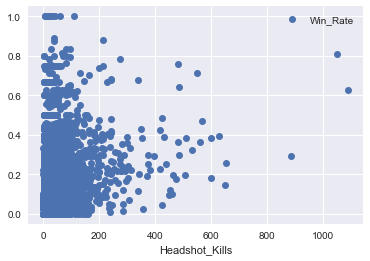

In [51]:
dfall.plot(x='Headshot_Kills', y='Win_Rate', style='o')

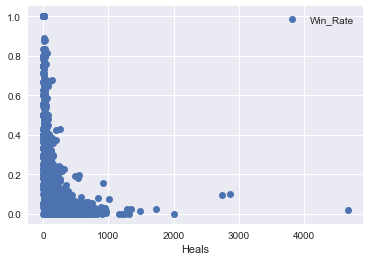

In [52]:
dfall.plot(x='Heals', y='Win_Rate', style='o')

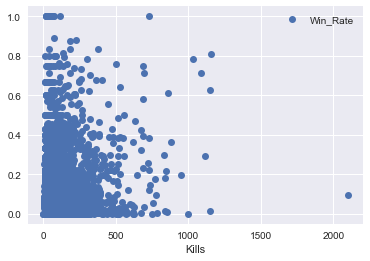

In [53]:
dfall.plot(x='Kills', y='Win_Rate', style='o')

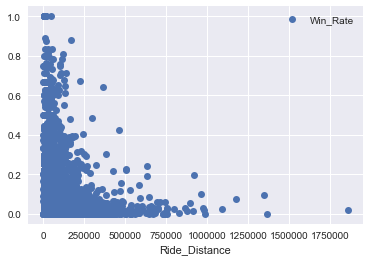

In [54]:
dfall.plot(x='Ride_Distance', y='Win_Rate', style='o')

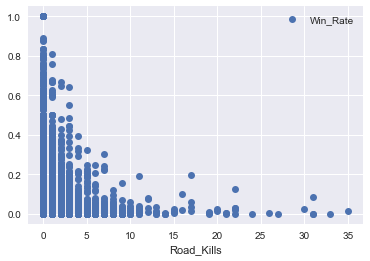

In [55]:
dfall.plot(x='Road_Kills', y='Win_Rate', style='o')

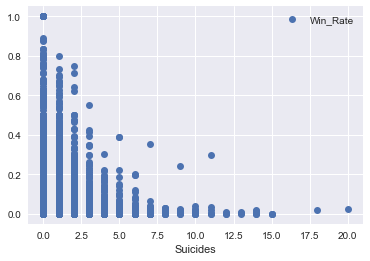

In [56]:
dfall.plot(x='Suicides', y='Win_Rate', style='o')

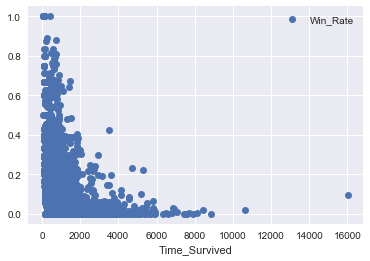

In [57]:
dfall.plot(x='Time_Survived', y='Win_Rate', style='o')

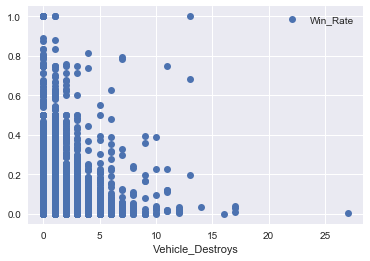

In [58]:
dfall.plot(x='Vehicle_Destroys', y='Win_Rate', style='o')

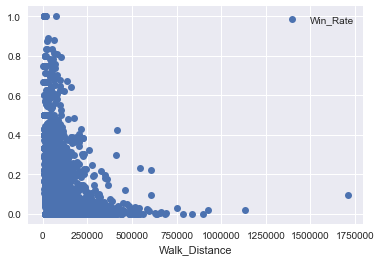

In [59]:
dfall.plot(x='Walk_Distance', y='Win_Rate', style='o')

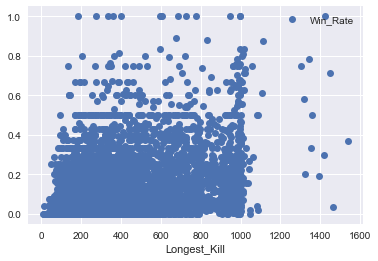

In [60]:
dfall.plot(x='Longest_Kill', y='Win_Rate', style='o')

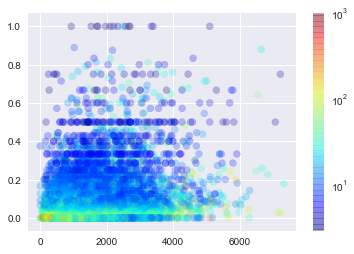

In [61]:
import matplotlib.colors as colors
cm = plt.cm.get_cmap('jet')# can use whatever's out there for colormap
norm = colors.LogNorm(vmin=min(dfall['Rounds_Played']), vmax = max(dfall['Rounds_Played']))
sc = plt.scatter(dfall['Ride_Distance_Per_Game'], dfall['Win_Rate'], marker='o', c = dfall['Rounds_Played'], norm=norm, cmap = cm, alpha=0.25)
plt.colorbar(sc)

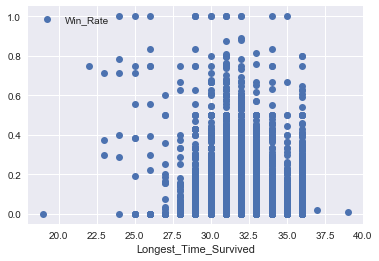

In [62]:
dfall.plot(x='Longest_Time_Survived', y='Win_Rate', style='o')

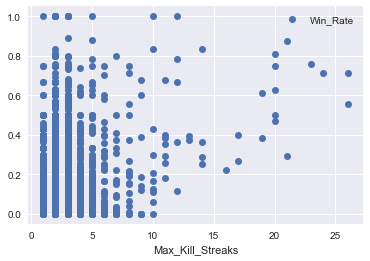

In [63]:
dfall.plot(x='Max_Kill_Streaks', y='Win_Rate', style='o')

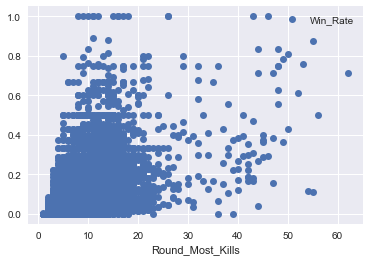

In [64]:
dfall.plot(x='Round_Most_Kills', y='Win_Rate', style='o')

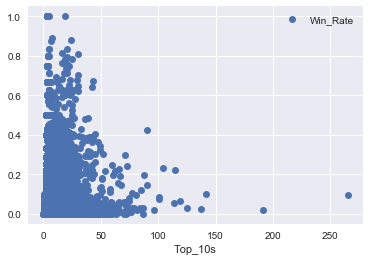

In [65]:
dfall.plot(x='Top_10s', y='Win_Rate', style='o')

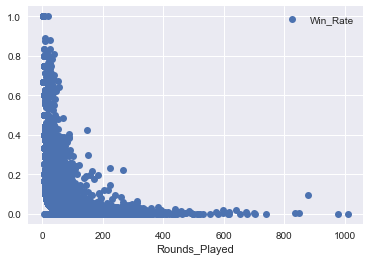

In [66]:
dfall.plot(x='Rounds_Played', y='Win_Rate', style='o')

In [67]:
dfall.corr()['Win_Rate'].sort_values(ascending=False)

Win_Rate                     1.000000
Damage_Dealt_Per_Game        0.786108
Kills_Per_Game               0.779450
Headshot_Kills_Per_Game      0.678662
Boosts_Per_Game              0.593334
Time_Survived_Per_Game       0.553157
Walk_Distance_Per_Game       0.542175
Round_Most_Kills             0.493204
Longest_Kill                 0.433892
Ride_Distance_Per_Game       0.342985
Assists_Per_Game             0.293055
Headshot_Kills               0.272340
Vehicle_Destroys_Per_Game    0.256520
Max_Kill_Streaks             0.221793
Kills                        0.074118
Heals_Per_Game               0.072768
Suicides_Per_Game            0.041366
Longest_Time_Survived        0.030647
Road_Kills_Per_Game          0.030442
Damage_Dealt                 0.018795
Vehicle_Destroys            -0.019419
Top_10s                     -0.064736
Road_Kills                  -0.127620
Boosts                      -0.135043
Ride_Distance               -0.161641
Suicides                    -0.176824
Assists     